In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
conda update -nbase -c defaults conda


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py update [-h] [-n ENVIRONMENT | -p PATH] [-c CHANNEL]
                              [--use-local] [--override-channels]
                              [--repodata-fn REPODATA_FNS]
                              [--experimental {jlap,lock}]
                              [--strict-channel-priority]
                              [--no-channel-priority]
                              [--no-deps | --only-deps] [--no-pin] [--copy]
                              [--no-shortcuts] [-C] [-k] [--offline] [-d]
                              [--json] [-q] [-v] [-y] [--download-only]
                              [--show-channel-urls] [--file FILE]
                              [--solver {classic,libmamba} | --experimental-solver {classic,libmamba}]
                              [--force-reinstall]
                              [--freeze-installed | --update-deps | -S | --update-all | --update-specs]
                              [--clobber]
                              [package_spe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
churn_df = pd.read_csv("churn_df.csv", index_col = 0)
X = churn_df[["total_day_charge" , "total_eve_charge"]].values
y = churn_df["churn"].values
print(X.shape , y.shape)

(3333, 2) (3333,)


In [3]:
from sklearn.neighbors import KNeighborsClassifier
X = churn_df[['account_length', 'customer_service_calls']].values
y = churn_df['churn'].values
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X,y)
X_new = np.array([[30.0, 17.5],
                 [107.0, 24.1],
                 [213.0, 10.9]])
print(X_new.shape)
y_pred = knn.predict(X_new)
print(f'Prediction: {y_pred}')

(3, 2)
Prediction: [0 1 0]


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                   random_state=21,
                                                   stratify=y)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
print(knn.score(X_test, y_test))

0.858


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
dict_values([0.777, 0.847, 0.836, 0.857, 0.854, 0.858, 0.856, 0.851, 0.852, 0.854, 0.854, 0.854, 0.854, 0.854, 0.855, 0.854, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855, 0.855])


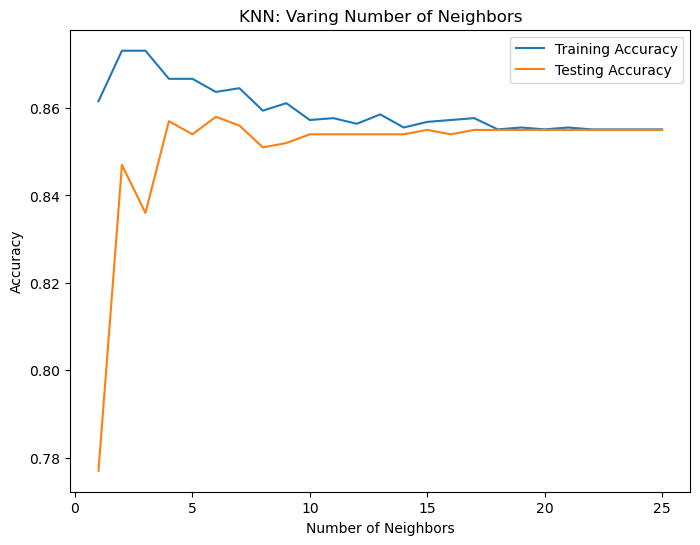

In [5]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)
print(neighbors)
for neighbor in neighbors:
 knn = KNeighborsClassifier(n_neighbors=neighbor)
 knn.fit(X_train,y_train)
 train_accuracies[neighbor] = knn.score(X_train, y_train)
 test_accuracies[neighbor] = knn.score(X_test, y_test)
#print(train_accuracies.values())
print(test_accuracies.values())
my_train = list(train_accuracies.values())
my_test = list(test_accuracies.values())
plt.figure(figsize=(8,6))
plt.title('KNN: Varing Number of Neighbors')
plt.plot(neighbors, my_train, label='Training Accuracy')
plt.plot(neighbors, my_test, label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, stratify=y)
knn.fit(X_train,y_train)
knn.score(X_test, y_test)
accuracy = knn.score(X_test, y_test)
print(accuracy)

0.8710644677661169


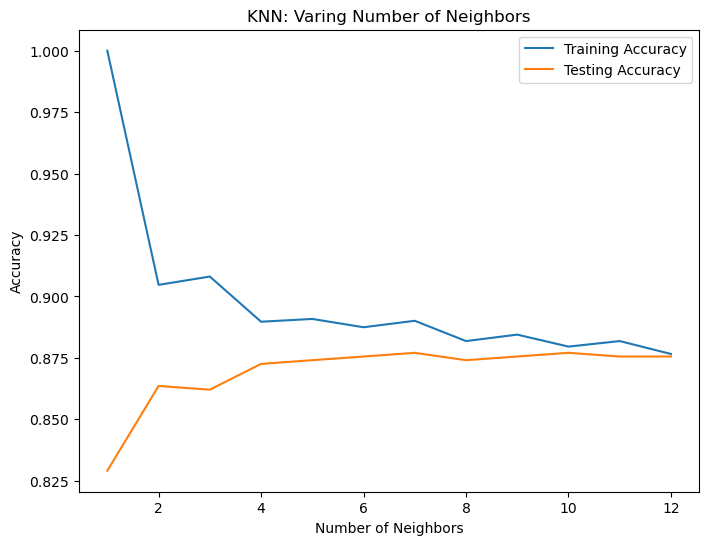

In [7]:
neighbors = np.arange(1,13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_train,y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test,y_test)
#print(train_accuracies.values())
#print(test_accuracies.values())
my_train = list(train_accuracies.values())
my_test = list(test_accuracies.values())
plt.figure(figsize = (8,6))
plt.title('KNN: Varing Number of Neighbors')
plt.plot(neighbors, my_train, label = "Training Accuracy")
plt.plot(neighbors, my_test, label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [8]:
print(neighbors)
print(train_accuracies)
print(test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
{1: 1.0, 2: 0.9047261815453863, 3: 0.9081020255063766, 4: 0.8897224306076519, 5: 0.890847711927982, 6: 0.8874718679669917, 7: 0.8900975243810952, 8: 0.8818454613653414, 9: 0.8844711177794449, 10: 0.8795948987246812, 11: 0.8818454613653414, 12: 0.8765941485371342}
{1: 0.8290854572713643, 2: 0.863568215892054, 3: 0.8620689655172413, 4: 0.8725637181409296, 5: 0.8740629685157422, 6: 0.8755622188905547, 7: 0.8770614692653673, 8: 0.8740629685157422, 9: 0.8755622188905547, 10: 0.8770614692653673, 11: 0.8755622188905547, 12: 0.8755622188905547}


(768, 7)


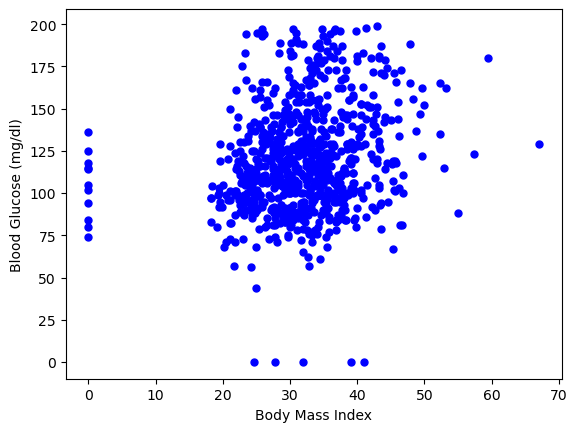

In [9]:
diabetes_df = pd.read_csv('diabetes.csv', index_col = 0)

print(diabetes_df.shape)

X = diabetes_df.drop('glucose', axis=1).values

y = diabetes_df['glucose'].values

X_bmi = X[:,3]

X_bmi = X_bmi.reshape(-1,1)

plt.scatter(X_bmi, y, s = 25, color = 'blue')

plt.ylabel('Blood Glucose (mg/dl)')

plt.xlabel('Body Mass Index')

#plt.grid(True)

plt.show()

In [10]:
import pandas as pd
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Unnamed: 0,pregnancies,glucose,triceps,insulin,bmi,age,diabetes
0,0,6,148,35,0,33.6,50,1
1,1,1,85,29,0,26.6,31,0
2,2,8,183,0,0,23.3,32,1
3,3,1,89,23,94,28.1,21,0
4,4,0,137,35,168,43.1,33,1


In [11]:
diabetes_df = pd.read_csv('diabetes.csv', index_col = 0) 
print(diabetes_df.shape)
#subset row for bmi not equal to 0 
diabetes_df = diabetes_df[diabetes_df['bmi'] != 0]
print(diabetes_df.shape)
#subset for glucose not equal to 0 
diabetes_df = diabetes_df[diabetes_df['glucose'] != 0]
print(diabetes_df.shape)
diabetes_df.head()

(768, 7)
(757, 7)
(752, 7)


,pregnancies,glucose,triceps,insulin,bmi,age,diabetes
0,6,148,35,0,33.6,50,1
1,1,85,29,0,26.6,31,0
2,8,183,0,0,23.3,32,1
3,1,89,23,94,28.1,21,0
4,0,137,35,168,43.1,33,1


In [12]:
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [13]:
X_bmi = X[: , 3]
print(y.shape , X_bmi.shape)

(752,) (752,)


In [14]:
X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)

(752, 1)


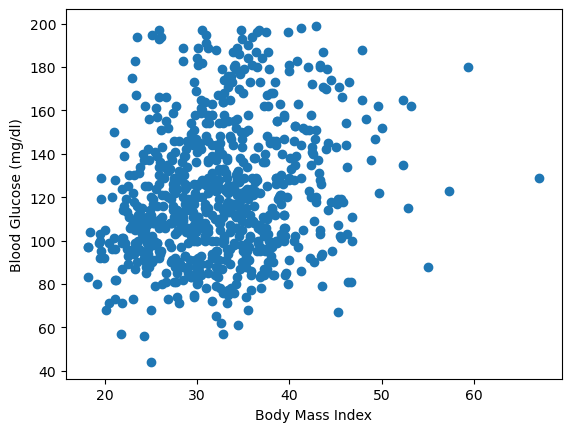

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

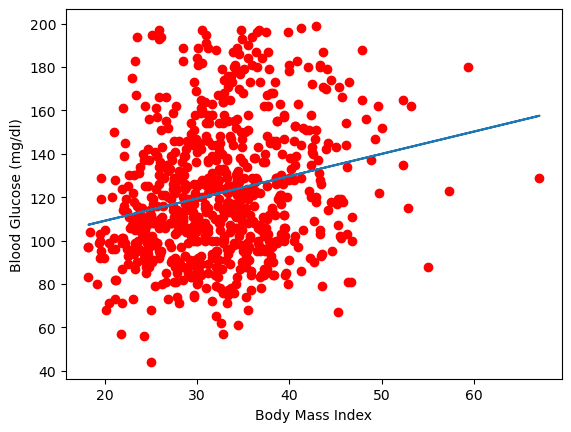

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y, color = 'red')
plt.plot(X_bmi, predictions)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

In [17]:
sales_df = pd.read_csv('sales_df.csv')
X = sales_df["radio"].values
y = sales_df["sales"].values
X=X.reshape(-1, 1)
print(X.shape)
print(y.shape)


(4546, 1)
(4546,)


In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
print(predictions[:5])


[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


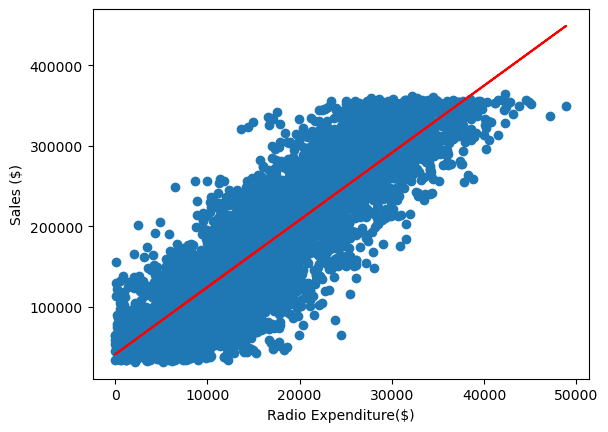

In [19]:
reg.fit(X,y)
plt.scatter(X, y)
predictions = reg.predict(X)
plt.plot(X, predictions, color = "red")
plt.ylabel("Sales ($)")
plt.xlabel("Radio Expenditure($)")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   random_state = 42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.7609020445216754

In [21]:
reg_all.score(X_test, y_test)

0.7609020445216754

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

45879.42086239429

In [23]:
sales_df = pd.read_csv('sales_df.csv')
X = sales_df.drop('sales', axis = 1).values
y = sales_df['sales'].values
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size =0.3, random_state = 42)
reg_all = LinearRegression()
reg_all.fit(X, y)
y_pred = reg_all.predict(X)
print(y_pred)
print(y_test)

[ 56791.65763518  46091.24746033 145818.80564775 ... 156632.78545397
 252809.96807675 149522.01185102]
[ 55261.28  67574.9  272250.11 ...  53900.32 127225.8  145708.6 ]


In [24]:
from sklearn.metrics import r2_score, mean_squared_error
r_squared = r2_score(y,y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(r_squared)
print(rmse)

0.9989951804994797
2948.302215132084


In [25]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg,X, y, cv=kf)
print(cv_results)

[0.99900932 0.99898731 0.99897213 0.99898864 0.99892796 0.99906015]


In [26]:
print(np.mean(cv_results), np.std(cv_results))

0.9989909165767226 3.972232714460531e-05


In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
X = sales_df[['radio', 'social_media']]
y = sales_df['sales']
kf = KFold(n_splits = 6, shuffle = True, random_state = 5)
reg = LinearRegression()
cv_scores = cross_val_score(reg,X,y,cv=kf)
print(cv_scores)

[0.74451678 0.77241887 0.76842114 0.7410406  0.75170022 0.74406484]


In [28]:
print(f'Mean: {np.mean(cv_scores)}')#, np.std(cv_scores))

Mean: 0.7536937414361207


In [29]:
print(f'STD: {np.std(cv_scores)}')

STD: 0.012305389070474678


In [30]:
print(np.quantile(cv_scores, 0.95))

0.7714194413346429


In [31]:
print(np.quantile(cv_scores, 0.25))

0.7441778242186281


In [32]:
from sklearn.linear_model import Lasso
diabetes_df = pd.read_csv('diabetes.csv', index_col = 0)
diabetes_df = diabetes_df[diabetes_df['bmi'] != 0]
diabetes_df = diabetes_df[diabetes_df['glucose'] != 0]
X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df['glucose'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scores = []
for alpha in [0.01,1.0,10.0, 20.0, 50.0]:
 lasso = Lasso(alpha=alpha)
 lasso.fit(X_train, y_train)
 lasso_pred = lasso.predict(X_test)
 scores.append(lasso.score(X_test, y_test))
print(scores)

[0.3562250067582078, 0.34618285370900226, 0.2014482392741529, 0.18595115472492296, 0.14542319216659472]


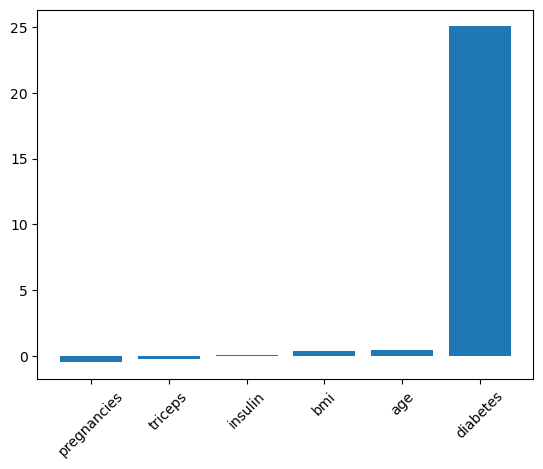

In [33]:
diabetes_df = pd.read_csv('diabetes.csv', index_col = 0)
diabetes_df = diabetes_df[diabetes_df['bmi'] != 0]
diabetes_df = diabetes_df[diabetes_df['glucose'] != 0]
X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df['glucose'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
names = diabetes_df.drop('glucose', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

[0.9990152104762495, 0.9990152105072273, 0.9990152107889495, 0.9990152111033483, 0.9990152120375869]


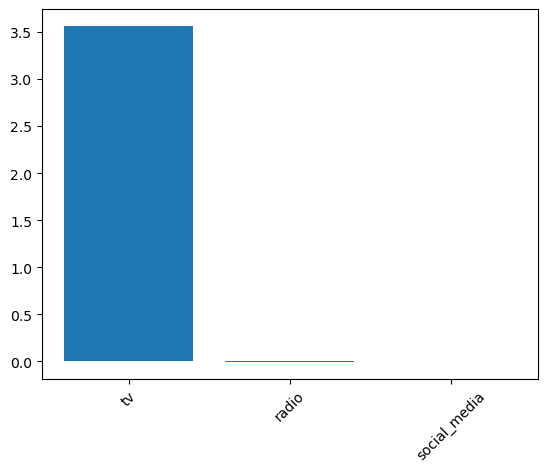

In [34]:
diabetes_df = pd.read_csv('sales_df.csv', index_col = 0)
diabetes_df = diabetes_df[diabetes_df['sales'] != 0]
X = diabetes_df.drop('sales', axis = 1).values
y = diabetes_df['sales'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scores = []
for alpha in [0.01,1.0,10.0, 20.0, 50.0]:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
names = diabetes_df.drop('sales', axis=1).columns
lasso = Lasso(alpha=0.3)
lasso_coef = lasso.fit(X,y).coef_
plt.bar(names,lasso_coef)
plt.xticks(rotation=45)
print(scores)
plt.show()


#### from sklearn.linear_model import Lasso
sales_df = pd.read_csv('sales_df.csv', index_col = 0)
sales_df = sales_df[sales_df['sales'] != 0]
X = sales_df.drop('sales', axis=1).values
y = sales_df['sales'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scores = []
for alpha in [0.01,1.0,10.0, 20.0, 50.0]:
 lasso = Lasso(alpha=alpha)
 lasso.fit(X_train, y_train)
 lasso_pred = lasso.predict(X_test)
 scores.append(lasso.score(X_test, y_test))
print(scores)
names = sales_df.drop('sales', axis=1).columns
lasso = Lasso(alpha=0.3)
lasso_coef = lasso.fit(X,y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

In [35]:
import pandas as pd
music_df = pd.read_csv('music.csv')
music_dummies = pd.get_dummies(music_df["genre"], drop_first=True)
print(music_dummies.head())

   Anime  Blues  Classical  Country  Electronic  Hip-Hop  Jazz  Rap  Rock
0      0      0          0        0           0        0     1    0     0
1      0      0          0        0           0        0     0    1     0
2      0      0          0        0           1        0     0    0     0
3      0      0          0        0           0        0     0    0     1
4      0      0          0        0           0        0     0    1     0


In [36]:
music_dummies = pd.concat([music_df, music_dummies], axis=1)
music_dummies = music_dummies.drop("genre", axis = 1)

In [37]:
music_df = pd.read_csv('music.csv', index_col = 0)
music_dummies = pd.get_dummies(music_df['genre'], drop_first=True)
#music_dummies.head()
music_dummies = pd.concat([music_df, music_dummies], axis = 1)
music_dummies = music_dummies.drop('genre', axis=1)
#music_dummies.head()
print(music_dummies.columns)
#from sklearn.model_selection import cross_val_score, KFold
#from sklearn.linear_model import LinearRegression
X = music_dummies.drop('popularity', axis=1).values
y = music_dummies['popularity'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
 random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
linreg = LinearRegression()
linreg_cv = cross_val_score(linreg, X_train, y_train, cv=kf,
 scoring='neg_mean_squared_error')
linreg_cv2 = cross_val_score(linreg, X_train, y_train, cv=kf)
print(np.sqrt(-linreg_cv))
print(linreg_cv2)

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'Anime', 'Blues', 'Classical', 'Country', 'Electronic',
       'Hip-Hop', 'Jazz', 'Rap', 'Rock'],
      dtype='object')
[8.15810501 8.63114581 7.52281687 8.62016985 7.91296943]
[0.66352267 0.68438203 0.68977273 0.64469603 0.63959551]


In [38]:
music_df = pd.read_csv('music_unclean.csv', index_col = 0)
print(music_df.isna().sum().sort_values())

genre                 8
popularity           31
loudness             44
liveness             46
tempo                46
speechiness          59
duration_ms          91
instrumentalness     91
danceability        143
valence             143
acousticness        200
energy              200
dtype: int64


In [39]:
#code for SimpleImputer example

from sklearn.impute import SimpleImputer

 

music_df = pd.read_csv('music_unclean.csv', index_col = 0)
print(music_df.columns)
print(music_df.isna().sum().sort_values())
music_df = music_df.dropna(subset=['genre','popularity','loudness','liveness','tempo'])
music_df['genre'] = np.where(music_df['genre'] == 'Rock', 1,0)
print(music_df.isna().sum().sort_values())

 

X_cat = music_df['genre'].values.reshape(-1,1)
X_num = music_df.drop(['genre','popularity'], axis=1).values
y = music_df['popularity'].values

 

X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size=0.3,
random_state = 12)
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size=0.3,
random_state = 12)

 

imp_cat = SimpleImputer(strategy='most_frequent')
X_train_cat = imp_cat.fit_transform(X_train_cat)
X_test_cat = imp_cat.transform(X_test_cat)

 

imp_num = SimpleImputer()
X_train_num = imp_num.fit_transform(X_train_num)
X_test_num = imp_num.transform(X_test_num)

 

X_train = np.append(X_train_num, X_train_cat, axis=1)
X_test = np.append(X_test_num, X_test_cat, axis=1)

 

columns = ['acousticness', 'danceability', 'duration_ms', 'energy',
'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
'valence', 'genre']
check = pd.DataFrame(X_train, columns = columns)
print(check.isna().sum().sort_values())

 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'genre'],
      dtype='object')
genre                 8
popularity           31
loudness             44
liveness             46
tempo                46
speechiness          59
duration_ms          91
instrumentalness     91
danceability        143
valence             143
acousticness        200
energy              200
dtype: int64
popularity            0
liveness              0
loudness              0
tempo                 0
genre                 0
duration_ms          29
instrumentalness     29
speechiness          53
danceability        127
valence             127
acousticness        178
energy              178
dtype: int64
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo              

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

music_df = pd.read_csv('music_unclean.csv', index_col = 0)

music_df = music_df.dropna(subset=['genre', 'popularity','loudness','liveness','tempo'])
music_df['genre'] = np.where(music_df['genre'] == 'Rock', 1, 0)

X = music_df.drop('genre', axis = 1).values
y = music_df['genre'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

imputer = SimpleImputer()
knn = KNeighborsClassifier(n_neighbors =3)

steps = [("imputer", imputer),("knn", knn)]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(pipeline.score(X_test,y_test))

[[78 57]
 [55 78]]
0.582089552238806


In [41]:
                                                                                                                                                       from sklearn.impute import SimpleImputer
music_df = pd.read_csv('music_unclean.csv', index_col = 0)
print(music_df.columns)
print(music_df.isna().sum().sort_values())
music_df = music_df.dropna(subset=['genre','popularity','loudness','liveness','tempo'])
music_df['genre'] = np.where(music_df['genre'] == 'Rock', 1,0)
print(music_df.isna().sum().sort_values())

 

X = music_df.drop('genre',axis=1).values
y = music_df['genre'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

imp = SimpleImputer(strategy='mean')
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

columns = ['acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','valence', 'genre']
check = pd.DataFrame(X_train, columns = columns)
print(check.isna().sum().sort_values())


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'genre'],
      dtype='object')
genre                 8
popularity           31
loudness             44
liveness             46
tempo                46
speechiness          59
duration_ms          91
instrumentalness     91
danceability        143
valence             143
acousticness        200
energy              200
dtype: int64
popularity            0
liveness              0
loudness              0
tempo                 0
genre                 0
duration_ms          29
instrumentalness     29
speechiness          53
danceability        127
valence             127
acousticness        178
energy              178
dtype: int64
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo              